In [1]:
import numpy as np
from sklearn.cluster import KMeans
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
from src.functions import *

In [2]:
path = "./data/train/"
files = os.listdir(path)
x_train = np.array([],dtype=np.uint8).reshape(0,784)
y_train = np.array([],dtype=np.int64)
categories = {}
for idx,f in enumerate(files):
    data = np.load(path+f)
    x_train = np.concatenate((x_train,data),axis=0)
    y_train = np.concatenate((y_train,idx*np.ones(data.shape[0])),axis=0)
    categories[idx] = f.split(".")[0]
    
x_test = np.load("./data/test/test.npy")

In [3]:
def get_accuracy(y,pred,categories,class_labels):
    act_pred = np.ones(y.shape) * -1
    for idx, p in enumerate(pred):
        act_pred[idx] = class_labels[p]
    return (y == act_pred).sum()/y.shape[0]

def print_pred(fname,pred,categories,class_labels):
    with open(fname,"w") as f:
        f.write("ID,CATEGORY\n")
        for idx, p in enumerate(pred):
            f.write("{0},{1}\n".format(idx,categories[class_labels[p]]))

In [4]:
# model = KMeans(n_clusters=20,max_iter=300,n_init=10,n_jobs=4,random_state=0)
# model.fit(x_train)
# save(model,"./out/kmeans/model1.pickle")
model = load("./out/kmeans/model1.pickle")

train_pred = model.predict(x_train)
class_labels = []
for idx in range(20):
    class_labels.append(np.unique(y_train[train_pred == idx],return_counts=True)[1].argmax())

# pred = model.predict(x_test)
# print_pred("./out/kmeans/pred1.csv",pred,categories,class_labels)

train_pred = model.predict(x_train)
print("Train Accuracy = {0}".format(get_accuracy(y_train,train_pred,categories,class_labels)))

Train Accuracy = 0.34279


In [5]:
max_iter = [10,20,30,40,50]
# models = []

# for max_it in max_iter:
#     models.append(KMeans(n_clusters=20,max_iter=max_it,n_init=10,n_jobs=4,random_state=0))
#     models[-1].fit(x_train)

# save(models,"./out/kmeans/models.pickle")
models = load("./out/kmeans/models.pickle")

train_acc = []
test_acc = [0.34805,0.35387,0.35367,0.34295,0.33135]

for i, model in enumerate(models):
    train_pred = model.predict(x_train)
    class_labels = []
    for idx in range(20):
        class_labels.append(np.unique(y_train[train_pred == idx],return_counts=True)[1].argmax())
    train_pred = model.predict(x_train)
    train_acc.append(get_accuracy(y_train,train_pred,categories,class_labels))
    print("Train Accuracy (max_iter = {0}) = {1}".format(max_iter[i],train_acc[-1]))
    # pred = model.predict(x_test)
    # print_pred("./out/kmeans/preds_{0}.csv".format(i),pred,categories,class_labels)

Train Accuracy (max_iter = 10) = 0.3497
Train Accuracy (max_iter = 20) = 0.35749
Train Accuracy (max_iter = 30) = 0.35649
Train Accuracy (max_iter = 40) = 0.34596
Train Accuracy (max_iter = 50) = 0.33461


<IPython.core.display.Javascript object>


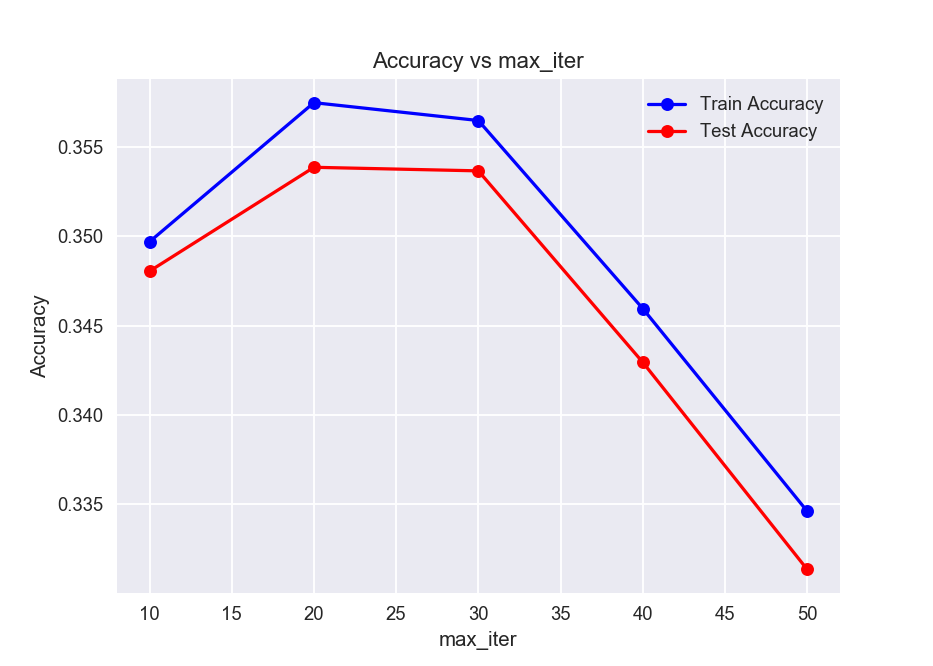

In [6]:
%matplotlib notebook

sns.set()
fig = plt.figure(figsize=(7,5))
train_patch = plt.plot(max_iter,train_acc,marker='o',color='b',label='Train Accuracy')[0]
test_patch = plt.plot(max_iter,test_acc,marker='o',color='r',label='Test Accuracy')[0]
plt.xlabel("max_iter")
plt.ylabel("Accuracy")
plt.legend(handles=[train_patch,test_patch])
plt.title("Accuracy vs max_iter")
plt.show()